In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y')

In [3]:
# Display the first 5 rows of the DataFrame
print(df.head())

# Display the last 5 rows of the DataFrame
print(df.tail())

# Descriptive Statistics
print(df.describe())

# Dimensions of DataFrame
print('DataFrame Shape:', df.shape)

# Summary of DataFrame
print(df.info())

# Display column names
print('Column Names:', df.columns)

# Data types of each column
print('Data Types:', df.dtypes)

# Frequency of all values in a column (Example: Nazwa column)
print('Value Counts (Nazwa):', df['Nazwa'].value_counts())

# Missing values in each column
print('Missing Values:', df.isnull().sum())

        Data     Nazwa     Miasto         Województwo  Wizyty
0 2022-06-01  Sklep 62  Bydgoszcz  kujawsko-pomorskie    6773
1 2022-12-01  Sklep 62  Bydgoszcz  kujawsko-pomorskie    7669
2 2022-04-01  Sklep 62  Bydgoszcz  kujawsko-pomorskie    6872
3 2022-07-01  Sklep 62  Bydgoszcz  kujawsko-pomorskie    5785
4 2022-11-01  Sklep 62  Bydgoszcz  kujawsko-pomorskie    6594
           Data     Nazwa               Miasto   Województwo  Wizyty
2251 2023-03-01  Sklep 82  Bielany Wrocławskie  dolnośląskie    4884
2252 2023-10-01  Sklep 82  Bielany Wrocławskie  dolnośląskie    4691
2253 2023-08-01  Sklep 82  Bielany Wrocławskie  dolnośląskie    5463
2254 2023-01-01  Sklep 82  Bielany Wrocławskie  dolnośląskie    5314
2255 2023-09-01  Sklep 82  Bielany Wrocławskie  dolnośląskie    4895
                      Data         Wizyty
count                 2256    2256.000000
mean   2022-12-16 00:00:00    8288.116578
min    2022-01-01 00:00:00     128.000000
25%    2022-06-23 12:00:00    1995.500000
50% 

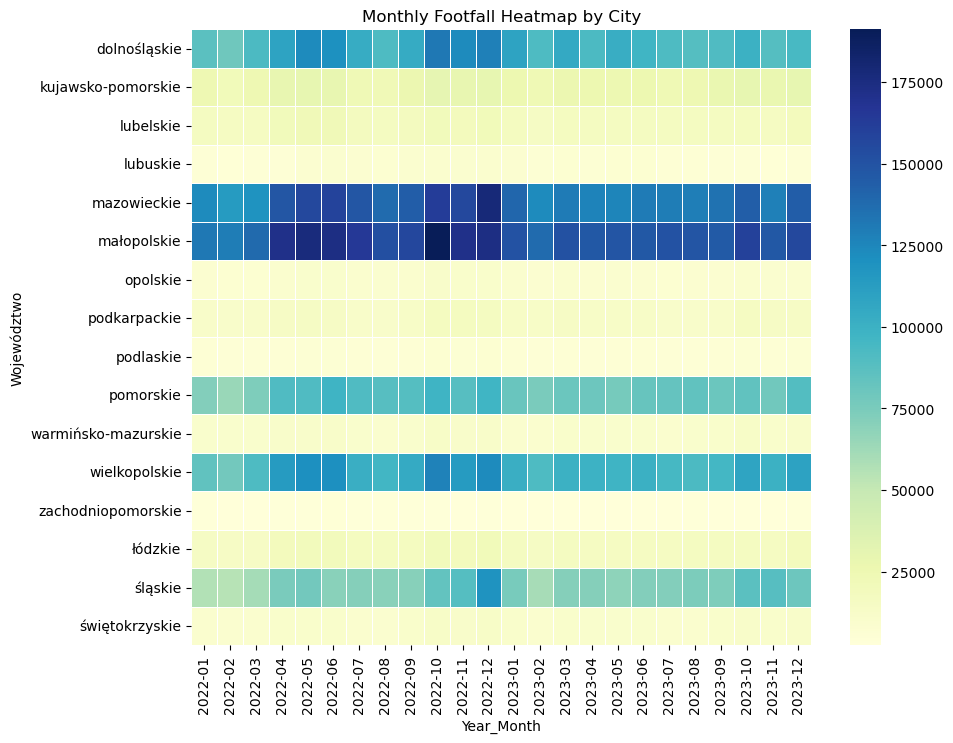

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# df = pd.read_csv('yourfile.csv')

df['Data'] = pd.to_datetime(df['Data']) # ensure 'Data' column is in datetime format
df['Year_Month'] = df['Data'].dt.to_period('M') # create a year-month column

# Pivot your DataFrame
pivot_df = df.pivot_table('Wizyty', ['Województwo'], 'Year_Month', aggfunc='sum')

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df, annot=False, fmt=".1f", linewidths=.5, cmap="YlGnBu")
plt.title('Monthly Footfall Heatmap by City')
plt.show()



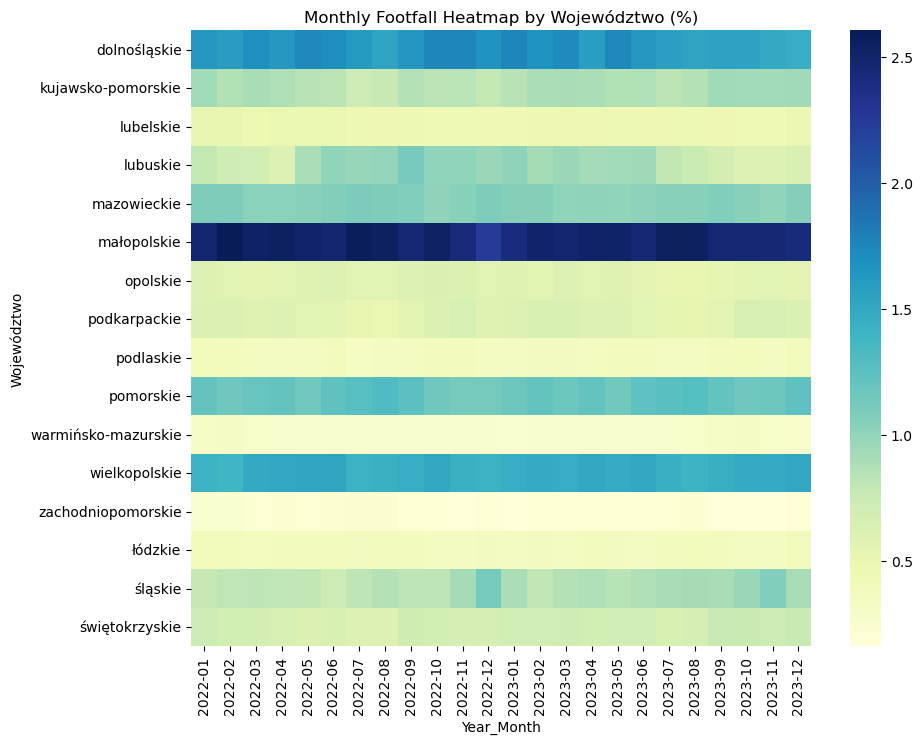

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# df = pd.read_csv('yourfile.csv')

df['Data'] = pd.to_datetime(df['Data']) # ensure 'Data' column is in datetime format
df['Year_Month'] = df['Data'].dt.to_period('M') # create a year-month column

# First pivot table to calculate total 'Wizyty' for each 'Year_Month'
total_wizyty_df = df.pivot_table('Wizyty', index='Year_Month', aggfunc='sum')

# Second pivot table to calculate 'Wizyty' for each 'Year_Month' and 'Województwo'
pivot_df = df.pivot_table('Wizyty', ['Województwo'], 'Year_Month')

# Calculate the percentage of 'Wizyty' for each 'Year_Month' and 'Województwo'
pivot_df = pivot_df.divide(total_wizyty_df['Wizyty'], axis='columns') * 100

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df, annot=False, cmap="YlGnBu")
plt.title('Monthly Footfall Heatmap by Województwo (%)')
plt.show()


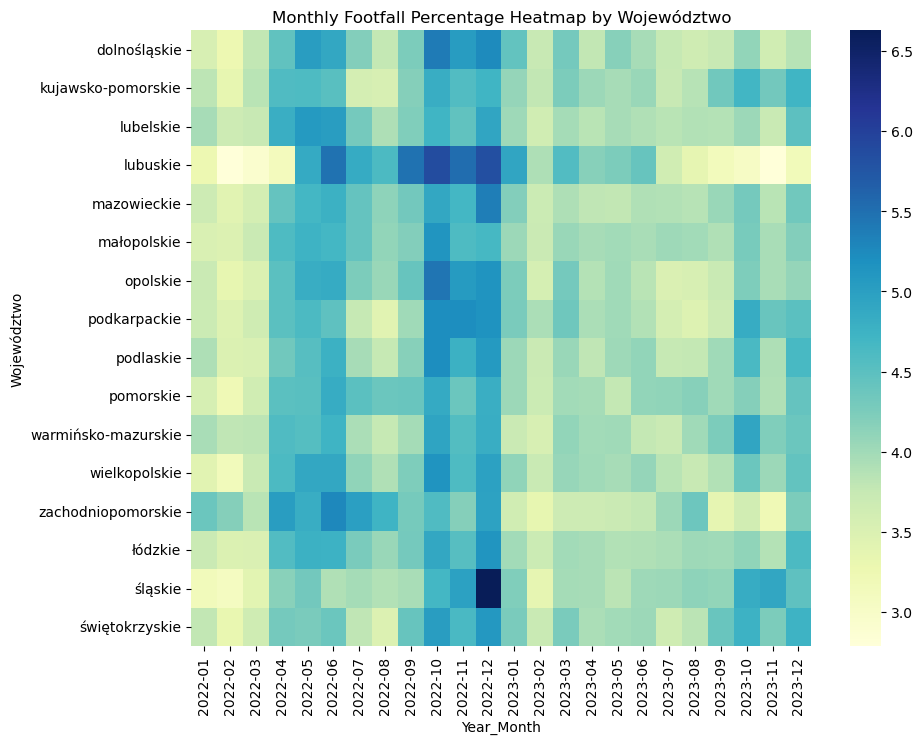

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df = pd.read_csv('yourfile.csv')

df['Data'] = pd.to_datetime(df['Data']) # Ensure 'Data' column is in datetime format
df['Year_Month'] = df['Data'].dt.to_period('M') # Create a Year-Month column

# Pivot your DataFrame
pivot_df = df.pivot_table('Wizyty', ['Województwo'], 'Year_Month')

# Get the percentages by dividing by row totals
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df_percentage, annot=False, cmap="YlGnBu")
plt.title('Monthly Footfall Percentage Heatmap by Województwo')
plt.show()
